In [1]:
!pip install imbalanced-learn matplotlib seaborn scikit-learn pandas numpy

In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

In [ ]:
# 2. Load Data & Remove Irrelevant Columns
df = pd.read_csv('2025_Sterling_Financial_Dataset_clean.csv')

# Drop ID, Date, and text feedback (not used for model)
cols_drop = ['date', 'customer_id', 'customer_feedback']
df_clean = df.drop(columns=[c for c in cols_drop if c in df.columns])

In [ ]:
# 3. Encode Categorical Variables
# Convert text (e.g., 'High Risk') to numbers
le = LabelEncoder()
for col in df_clean.select_dtypes(include=['object']).columns:
    df_clean[col] = le.fit_transform(df_clean[col])

In [ ]:
# 4. Train-Test Split (80/20)
target = 'default_history'
X = df_clean.drop(columns=[target])
y = df_clean[target]

# Stratify ensures the default rate is consistent in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# 5. Handle Imbalance using SMOTE
# Applied ONLY to Training Data to prevent data leakage
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Train size after SMOTE: {X_train_smote.shape}")

In [ ]:
# 6. Random Forest Model Training
rf_model = RandomForestClassifier(
    n_estimators=200,    # Number of trees
    max_depth=10,        # Prevent overfitting
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_smote, y_train_smote)

In [ ]:
# 7. Model Evaluation (Metrics)
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

print("Classification Report:\n")
print(classification_report(y_test, y_pred))
auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {auc:.4f}")

In [ ]:
Visualization: Confusion Matrix & Feature Importance
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix')
# Feature Importance
feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns).nlargest(8)
feat_imp.plot(kind='barh', ax=ax[1], color='teal')
ax[1].set_title('Top 8 Feature Importance')
plt.tight_layout()
plt.show()


Data preprocessing completed.

Original Train Distribution:
default_history
0    1126
1      74
Name: count, dtype: int64
Original Imbalance Ratio: 1:15.2

Train Distribution after SMOTE:
default_history
0    1126
1    1126
Name: count, dtype: int64

Training the model...
Model training completed.

=== Classification Report (Target: default_history) ===
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       282
           1       0.29      0.33      0.31        18

    accuracy                           0.91       300
   macro avg       0.62      0.64      0.63       300
weighted avg       0.92      0.91      0.91       300

Model Accuracy: 0.9100
ROC-AUC Score: 0.7579


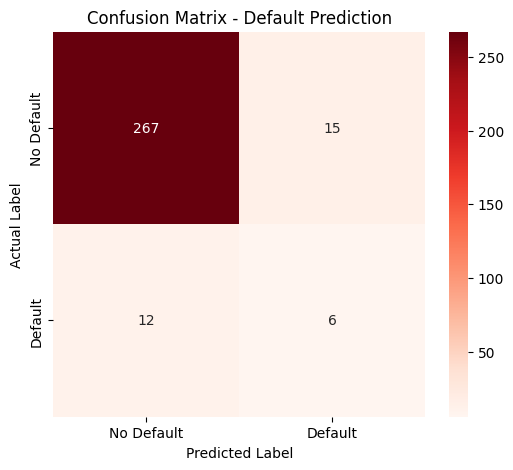

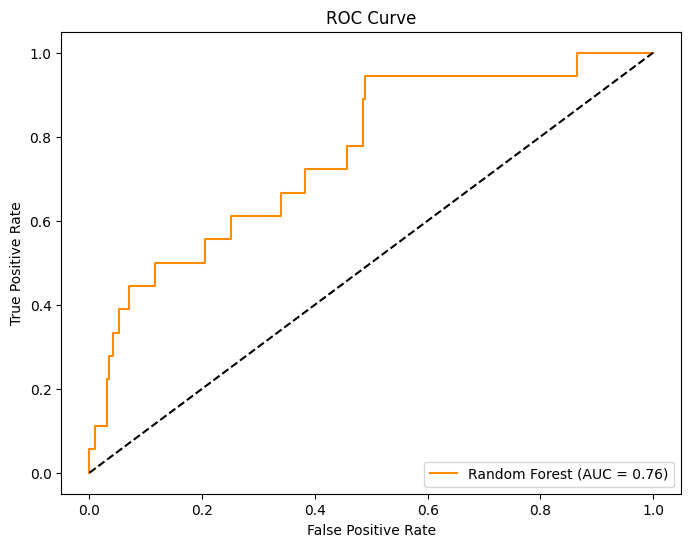

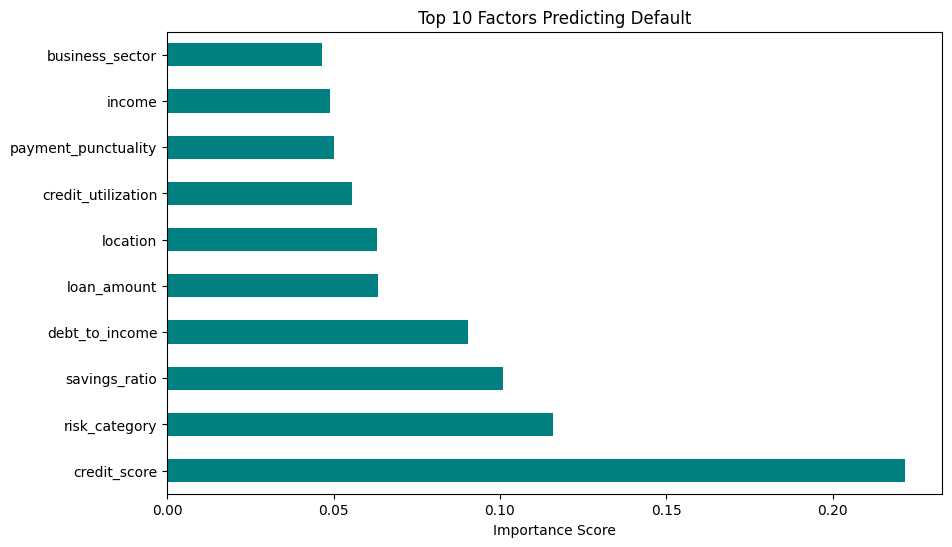

In [7]:
# ==========================================
# Step 1: Import Necessary Libraries
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models and Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

# Library for Handling Imbalance (SMOTE)
from imblearn.over_sampling import SMOTE

# ==========================================
# Step 2: Load and Clean Data
# ==========================================
file_path = '2025_Sterling_Financial_Dataset_clean.csv'
df = pd.read_csv(file_path)

# 2.1 Remove Irrelevant Columns
# 'date' and 'customer_id' are usually not useful for prediction
# 'customer_feedback' is raw text; drop if not vectorized using NLP
cols_to_drop = ['date', 'customer_id', 'customer_feedback']
df_clean = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

# 2.2 Encode Categorical Variables
# Note: 'risk_category' is now an input feature and needs to be encoded
categorical_cols = df_clean.select_dtypes(include=['object']).columns
le = LabelEncoder()
label_mappings = {}

for col in categorical_cols:
    df_clean[col] = le.fit_transform(df_clean[col])
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

print("Data preprocessing completed.")

# ==========================================
# Step 3: Prepare Data & Handle Imbalance (SMOTE)
# ==========================================

# 3.1 Set Target Variable to 'default_history'
target_col = 'default_history'

X = df_clean.drop(columns=[target_col])
y = df_clean[target_col]

# 3.2 Split Train and Test Sets
# stratify=y ensures the proportion of defaults is consistent in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nOriginal Train Distribution:\n{y_train.value_counts()}")
print(f"Original Imbalance Ratio: 1:{y_train.value_counts()[0] / y_train.value_counts()[1]:.1f}")

# 3.3 Apply SMOTE to Handle Imbalance
# SMOTE synthesizes new default samples (1) to balance 0 and 1 in the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"\nTrain Distribution after SMOTE:\n{y_train_smote.value_counts()}")

# ==========================================
# Step 4: Random Forest Model Development
# ==========================================

# To capture the minority class, we can use class_weight='balanced' or rely on SMOTE
# Here we primarily rely on SMOTE
rf_model = RandomForestClassifier(
    n_estimators=200,      # Increase number of trees
    max_depth=10,          # Control depth to prevent overfitting
    min_samples_leaf=4,    # Minimum samples per leaf to increase generalization
    random_state=42,
    n_jobs=-1
)

print("\nTraining the model...")
rf_model.fit(X_train_smote, y_train_smote)
print("Model training completed.")

# ==========================================
# Step 5: Model Evaluation
# ==========================================

y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1] # Get probability of class "1" (Default)

# 5.1 Basic Metrics
print("\n=== Classification Report (Target: default_history) ===")
# Focus on Recall and F1-score for Class 1 (Default)
print(classification_report(y_test, y_pred))

# Calculate and Print Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc:.4f}")

# 5.2 ROC-AUC Score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {auc_score:.4f}")

# 5.3 Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix - Default Prediction')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

# 5.4 ROC Curve Visualization
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--') # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 5.5 Feature Importance Visualization
importances = rf_model.feature_importances_
feature_names = X.columns
feat_importances = pd.Series(importances, index=feature_names)

plt.figure(figsize=(10, 6))
feat_importances.nlargest(10).plot(kind='barh', color='teal')
plt.title('Top 10 Factors Predicting Default')
plt.xlabel('Importance Score')
plt.show()